Prepare a classification model using Naive Bayes,for salary data 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data=pd.read_csv('/users/rahulkp/downloads/SalaryData_Train.csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_data=pd.read_csv('/users/rahulkp/downloads/SalaryData_Test.csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
train_data.shape

(30161, 14)

In [8]:
test_data.shape

(15060, 14)

In [10]:
train_data[train_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [11]:
train1=train_data.drop_duplicates()
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [12]:
train1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
train1.shape

(26903, 14)

In [16]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [17]:
train1.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [18]:
train1.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [19]:
train1.maritalstatus.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
train1.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
train1.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [22]:
train1.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [23]:
train1.sex.unique()

array([' Male', ' Female'], dtype=object)

In [24]:
train1.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [26]:
train1.native.value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [25]:
train1.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [27]:
train1.workclass.replace((' State-gov',' Self-emp-not-inc',' Private',' Federal-gov',' Local-gov',' Self-emp-inc',' Without-pay'),(1,2,3,4,5,6,7),inplace=True)
train1.education.replace((' Bachelors',' HS-grad',' 11th',' Masters',' 9th',' Some-college',' Assoc-acdm',' 7th-8th',' Doctorate',' Assoc-voc',' Prof-school',' 5th-6th',' 10th',' Preschool',' 12th',' 1st-4th'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16),inplace=True)
train1.maritalstatus.replace((' Never-married',' Married-civ-spouse',' Divorced',' Married-spouse-absent',' Separated',' Married-AF-spouse',' Widowed'),(1,2,3,4,5,6,7),inplace=True)
train1.occupation.replace((' Adm-clerical',' Exec-managerial',' Handlers-cleaners',' Prof-specialty',' Other-service',' Sales',' Transport-moving',' Farming-fishing',' Machine-op-inspct',' Tech-support',' Craft-repair',' Protective-serv',' Armed-Forces',' Priv-house-serv'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14),inplace=True)
train1.relationship.replace((' Not-in-family',' Husband',' Wife',' Own-child',' Unmarried',' Other-relative'),(1,2,3,4,5,6),inplace=True)
train1.race.replace((' White',' Black',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other'),(1,2,3,4,5),inplace=True)
train1.sex.replace((' Male',' Female'),(1,2),inplace=True)
train1.native.replace((' United-States',' Cuba',' Jamaica',' India',' Mexico',
       ' Puerto-Rico',' Honduras',' England',' Canada',' Germany',
       ' Iran',' Philippines',' Poland',' Columbia',' Cambodia',
       ' Thailand',' Ecuador',' Laos',' Taiwan',' Haiti',' Portugal',
       ' Dominican-Republic',' El-Salvador',' France',' Guatemala',
       ' Italy',' China',' South',' Japan',' Yugoslavia',' Peru',
       ' Outlying-US(Guam-USVI-etc)',' Scotland',' Trinadad&Tobago',
       ' Greece',' Nicaragua',' Vietnam',' Hong',' Ireland',
       ' Hungary'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40),inplace=True)
train1.Salary.replace((' <=50K',' >50K'),(0,1),inplace=True)

In [28]:
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,1,1,13,1,1,1,1,1,2174,0,40,1,0
1,50,2,1,13,2,2,2,1,1,0,0,13,1,0
2,38,3,2,9,3,3,1,1,1,0,0,40,1,0
3,53,3,3,7,2,3,2,2,1,0,0,40,1,0
4,28,3,1,13,2,4,3,2,2,0,0,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,3,4,14,2,2,2,1,1,0,0,40,1,1
30155,22,3,6,10,1,12,1,1,1,0,0,40,1,0
30156,27,3,7,12,2,10,3,1,2,0,0,38,1,0
30158,58,3,2,9,7,1,5,1,2,0,0,40,1,0


In [36]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            26903 non-null  int64
 1   workclass      26903 non-null  int64
 2   education      26903 non-null  int64
 3   educationno    26903 non-null  int64
 4   maritalstatus  26903 non-null  int64
 5   occupation     26903 non-null  int64
 6   relationship   26903 non-null  int64
 7   race           26903 non-null  int64
 8   sex            26903 non-null  int64
 9   capitalgain    26903 non-null  int64
 10  capitalloss    26903 non-null  int64
 11  hoursperweek   26903 non-null  int64
 12  native         26903 non-null  int64
 13  Salary         26903 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


<AxesSubplot:>

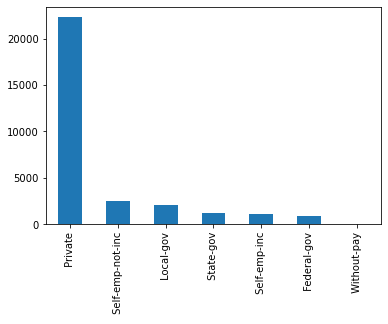

In [29]:
train_data['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

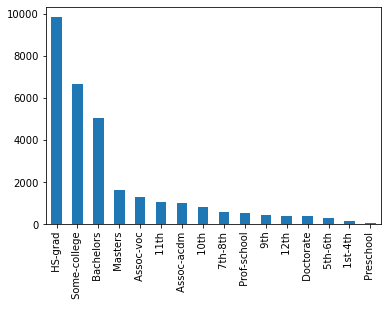

In [30]:
train_data['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

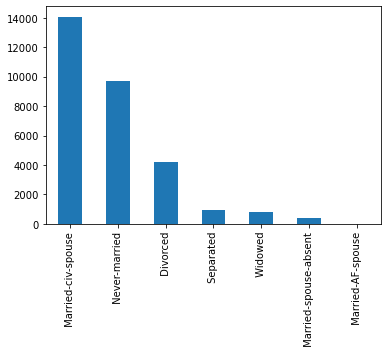

In [31]:
train_data['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

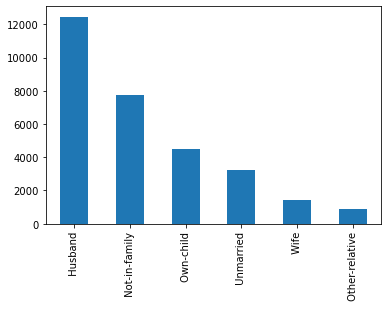

In [32]:
train_data['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

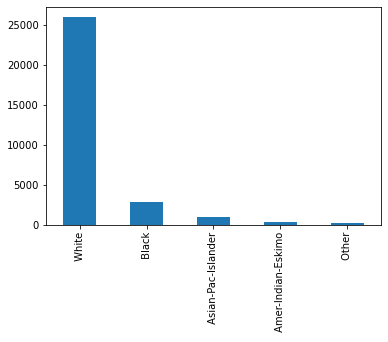

In [33]:
train_data['race'].value_counts().plot(kind='bar')

<AxesSubplot:>

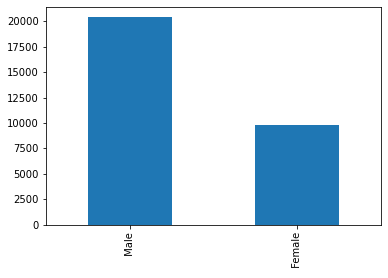

In [34]:
train_data['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

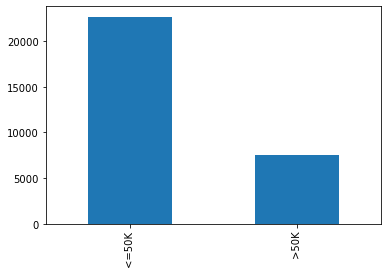

In [35]:
train_data['Salary'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='native', ylabel='Density'>

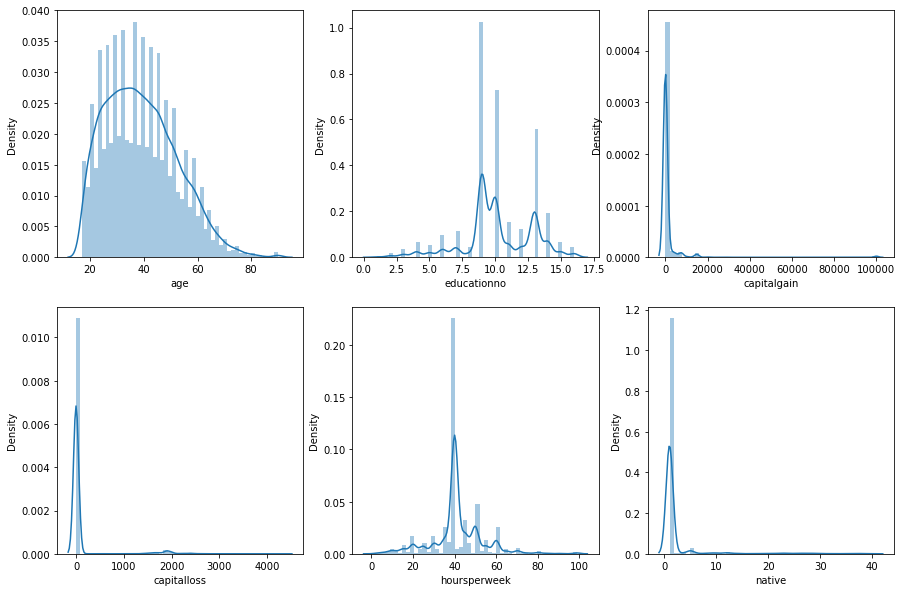

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.distplot(train1.age,ax=ax[0,0])
sns.distplot(train1.educationno,ax=ax[0,1])
sns.distplot(train1.capitalgain,ax=ax[0,2])
sns.distplot(train1.capitalloss,ax=ax[1,0])
sns.distplot(train1.hoursperweek,ax=ax[1,1])
sns.distplot(train1.native,ax=ax[1,2])

<AxesSubplot:xlabel='occupation', ylabel='Density'>

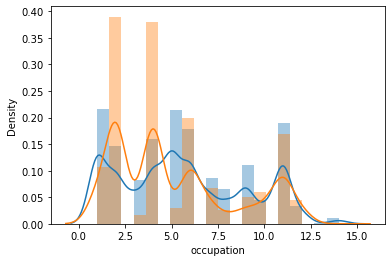

In [44]:
sns.distplot(train1[train1.Salary==0].iloc[:,5],hist=True,bins=20)
sns.distplot(train1[train1.Salary==1].iloc[:,5],hist=True,bins=20)

<AxesSubplot:xlabel='education', ylabel='Density'>

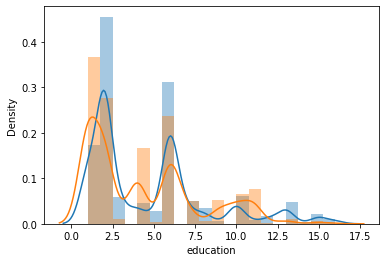

In [45]:
sns.distplot(train1[train1.Salary==0].iloc[:,2],hist=True,bins=20)
sns.distplot(train1[train1.Salary==1].iloc[:,2],hist=True,bins=20)

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

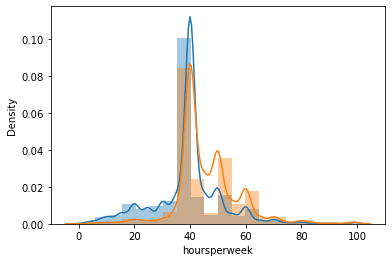

In [46]:
sns.distplot(train1[train1.Salary==0].iloc[:,-3],hist=True,bins=20)
sns.distplot(train1[train1.Salary==1].iloc[:,-3],hist=True,bins=20)

<AxesSubplot:xlabel='relationship', ylabel='Density'>

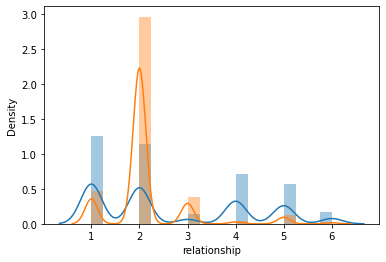

In [47]:
sns.distplot(train1[train1.Salary==0].iloc[:,6],hist=True,bins=20)
sns.distplot(train1[train1.Salary==1].iloc[:,6],hist=True,bins=20)

<AxesSubplot:xlabel='native', ylabel='Density'>

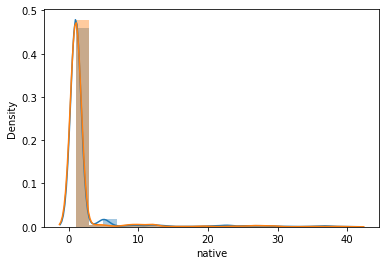

In [48]:
sns.distplot(train1[train1.Salary==0].iloc[:,-2],hist=True,bins=20)
sns.distplot(train1[train1.Salary==1].iloc[:,-2],hist=True,bins=20)

In [49]:
test_data[test_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [52]:
test1=test_data.drop_duplicates()
test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [53]:
test1.shape

(14130, 14)

In [54]:
test1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [55]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
 13  Salary         14130 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [56]:
test1.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [57]:
test1.education.unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [58]:
test1.maritalstatus.unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [59]:
test1.occupation.unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [60]:
test1.relationship.unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [61]:
test1.race.unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [62]:
test1.sex.unique()

array([' Male', ' Female'], dtype=object)

In [63]:
test1.native.unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [64]:
test1.native.value_counts()

 United-States                 12859
 Mexico                          292
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [65]:
test1.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [66]:
test1.workclass.replace((' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'),(1,2,3,4,5,6,7),inplace=True)
test1.education.replace((' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16),inplace=True)
test1.maritalstatus.replace((' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'),(1,2,3,4,5,6,7),inplace=True)
test1.occupation.replace((' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14),inplace=True)
test1.relationship.replace((' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'),(1,2,3,4,5,6),inplace=True)
test1.race.replace((' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'),(1,2,3,4,5),inplace=True)
test1.sex.replace((' Male', ' Female'),(1,2),inplace=True)
test1.native.replace((' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40),inplace=True)
test1.Salary.replace((' <=50K', ' >50K'),(0,1),inplace=True) 

In [67]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


<AxesSubplot:xlabel='native', ylabel='Density'>

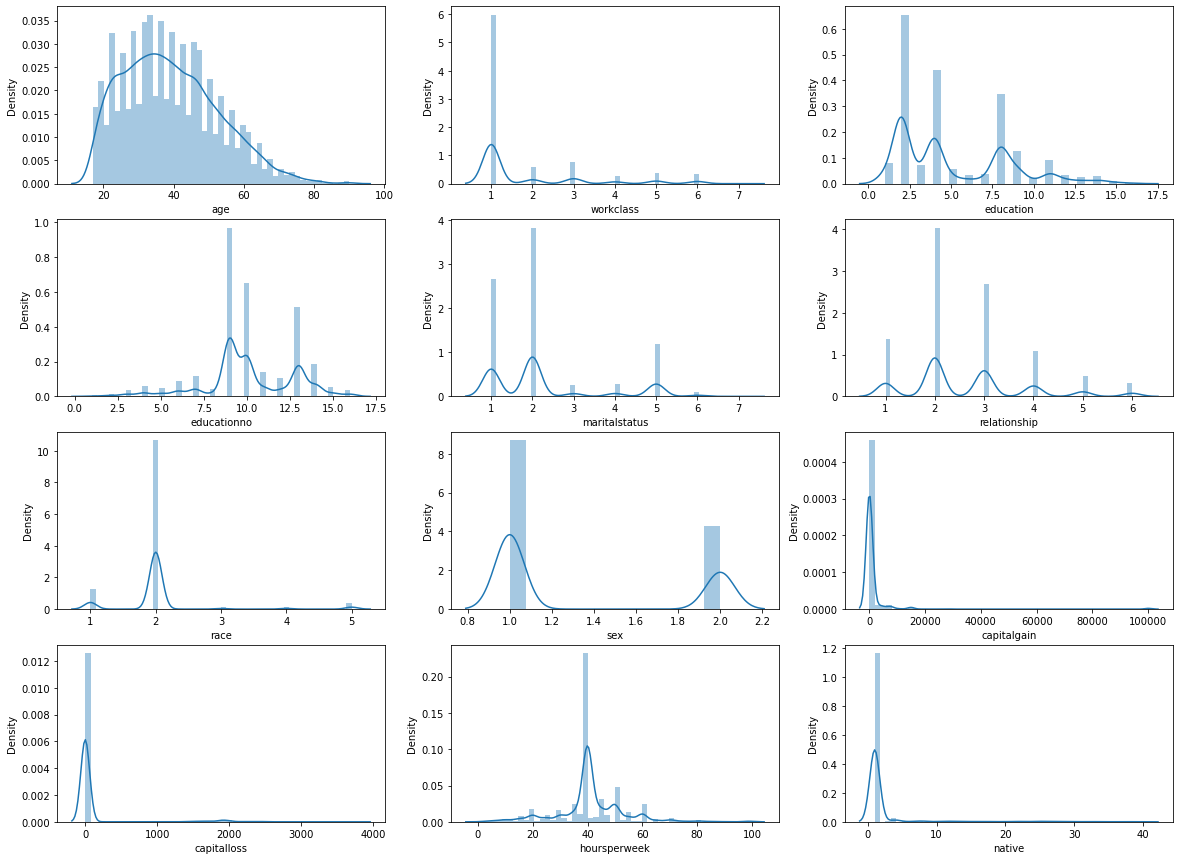

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,3,figsize=(20,15))
sns.distplot(test1.age,ax=ax[0,0])
sns.distplot(test1.workclass,ax=ax[0,1])
sns.distplot(test1.education,ax=ax[0,2])
sns.distplot(test1.educationno,ax=ax[1,0])
sns.distplot(test1.maritalstatus,ax=ax[1,1])
sns.distplot(test1.relationship,ax=ax[1,2])
sns.distplot(test1.race,ax=ax[2,0])
sns.distplot(test1.sex,ax=ax[2,1])
sns.distplot(test1.capitalgain,ax=ax[2,2])
sns.distplot(test1.capitalloss,ax=ax[3,0])
sns.distplot(test1.hoursperweek,ax=ax[3,1])
sns.distplot(test1.native,ax=ax[3,2])

<AxesSubplot:>

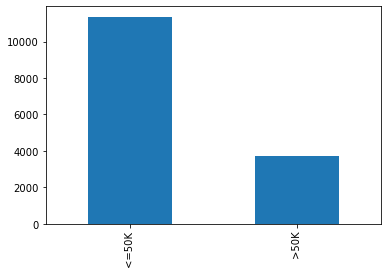

In [71]:
test_data['Salary'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='occupation', ylabel='Density'>

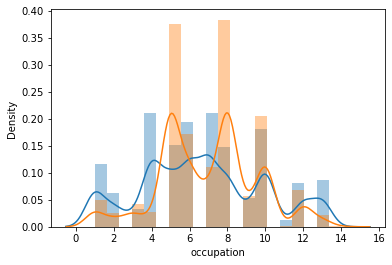

In [72]:
sns.distplot(test1[test1.Salary==0].iloc[:,5],hist=True,bins=20)
sns.distplot(test1[test1.Salary==1].iloc[:,5],hist=True,bins=20)

<AxesSubplot:xlabel='education', ylabel='Density'>

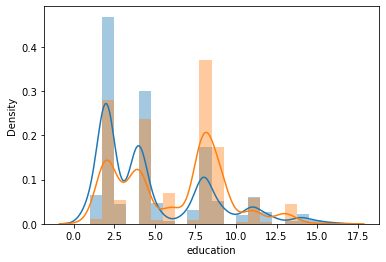

In [73]:
sns.distplot(test1[test1.Salary==0].iloc[:,2],hist=True,bins=20)
sns.distplot(test1[test1.Salary==1].iloc[:,2],hist=True,bins=20)

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

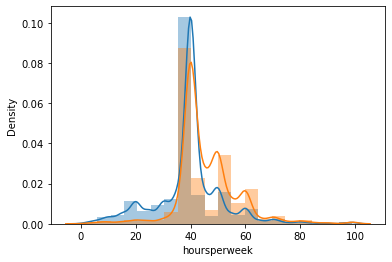

In [74]:
sns.distplot(test1[test1.Salary==0].iloc[:,-3],hist=True,bins=20)
sns.distplot(test1[test1.Salary==1].iloc[:,-3],hist=True,bins=20)

<AxesSubplot:xlabel='relationship', ylabel='Density'>

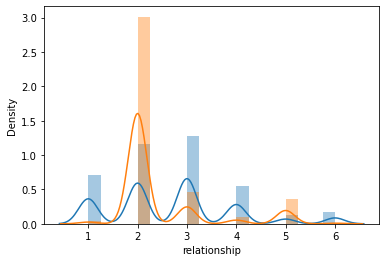

In [75]:
sns.distplot(test1[test1.Salary==0].iloc[:,6],hist=True,bins=20)
sns.distplot(test1[test1.Salary==1].iloc[:,6],hist=True,bins=20)

<AxesSubplot:xlabel='native', ylabel='Density'>

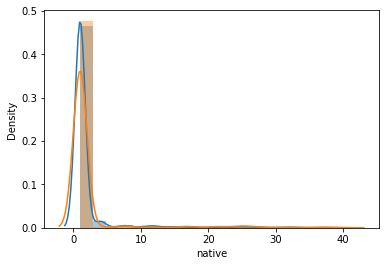

In [76]:
sns.distplot(test1[test1.Salary==0].iloc[:,-2],hist=True,bins=20)
sns.distplot(test1[test1.Salary==1].iloc[:,-2],hist=True,bins=20)

In [80]:
X_train=train1.iloc[:,0:13]
Y_train=train1.iloc[:,13]

In [81]:
X_test=test1.iloc[:,0:13]
Y_test=test1.iloc[:,13]

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model=GaussianNB()
gnb=model.fit(X_train,Y_train)

In [90]:
y_predict=gnb.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
from sklearn import metrics
metrics.accuracy_score(Y_test,y_predict)

0.7959660297239916

Lets check for Multinomial naive bayes as well

In [92]:
model2=MultinomialNB()
mnb=model.fit(X_train,Y_train)

In [93]:
y_predict2=mnb.predict(X_test)
y_predict2

array([0, 0, 0, ..., 0, 0, 1])

In [94]:
metrics.accuracy_score(Y_test,y_predict2)

0.7959660297239916

As we can see there isnt any difference in accuracy between Gaussian and Multinomial Naive Bayes

lets check the accuracy for all the features of train data as well

In [95]:
for i in train_data.columns[:-1]:
    model3=GaussianNB()
    new_model=model3.fit(X_train[[i]],Y_train)
    y_test_pred=new_model.predict(X_test[[i]])    
    print("accuracy for feature" ,i,metrics.accuracy_score(Y_test,y_test_pred))

accuracy for feature age 0.7515923566878981
accuracy for feature workclass 0.7547062986553432
accuracy for feature education 0.7515923566878981
accuracy for feature educationno 0.7693559801840056
accuracy for feature maritalstatus 0.7515923566878981
accuracy for feature occupation 0.7515923566878981
accuracy for feature relationship 0.7515923566878981
accuracy for feature race 0.7515923566878981
accuracy for feature sex 0.7515923566878981
accuracy for feature capitalgain 0.7863411181882519
accuracy for feature capitalloss 0.7526539278131635
accuracy for feature hoursperweek 0.7515923566878981
accuracy for feature native 0.7515923566878981


As we can see none of the independent features had overcome the accuracy score of 79.59% for the given dataset